
# Sales Prediction Analysis using Advertising Dataset (Structured)

This notebook reproduces and structures the analysis from your Python script into clear sections and cells.  
It supports **Excel or CSV** input, cleans non-numeric columns, explores correlations, trains a **Linear Regression** model, evaluates performance, visualizes results (including a **3D scatter**), and tests additional scenarios (normalization, reduced-feature model).

> Update the **`file_path`** in the *Load Dataset* cell to point to your data file.


## 1. Imports

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401


## 2. Load Dataset (Excel or CSV)

In [6]:

# Set your file path here:
file_path = r'/content/advertising_sales_data.xlsx'  # <- change if needed

# Load as CSV or Excel depending on extension
try:
    if str(file_path).lower().endswith('.csv'):
        df = pd.read_csv(file_path, encoding='latin1')
    else:
        df = pd.read_excel(file_path)
    print("✅ Dataset loaded successfully.")
except FileNotFoundError:
    raise FileNotFoundError(f"Error: The file '{file_path}' was not found. Please check the file path.")

print('Initial Data Preview:')
display(df.head())
print(df.info())


✅ Dataset loaded successfully.
Initial Data Preview:


,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB
None


## 3. Clean Dataset (Numeric Columns Only)

In [7]:

# Keep only numeric columns required by the model
numeric_cols = ['TV', 'Radio', 'Newspaper', 'Sales']
df = df[numeric_cols].apply(pd.to_numeric, errors='coerce').dropna()

print('Cleaned Data Preview:')
display(df.head())
print(df.describe())


Cleaned Data Preview:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


               TV       Radio   Newspaper       Sales
count  198.000000  198.000000  198.000000  198.000000
mean   146.785859   23.260606   30.694444   15.125758
std     86.213342   14.921914   21.842166    5.309478
min      0.700000    0.000000    0.300000    1.600000
25%     73.725000    9.925000   12.650000   11.000000
50%    149.750000   22.400000   26.050000   16.000000
75%    219.475000   36.575000   45.100000   19.150000
max    296.400000   49.600000  114.000000   27.000000


## 4. EDA: Averages & Correlations

Average TV Advertising Spend: 146.79
Correlation between Radio and Sales: 0.35

Correlation of each advertising medium with Sales:
TV           0.901372
Radio        0.349728
Newspaper    0.159125
Name: Sales, dtype: float64
Highest impact on sales: TV


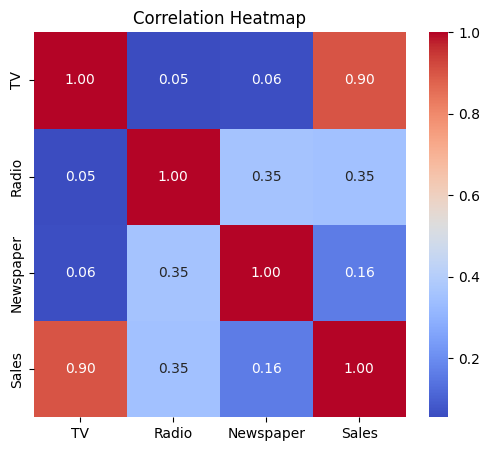

In [8]:

# Q1: Average TV advertising spend
avg_tv = df['TV'].mean()
print(f"Average TV Advertising Spend: {avg_tv:.2f}")

# Q2: Correlation between Radio and Sales
radio_sales_corr = df['Radio'].corr(df['Sales'])
print(f"Correlation between Radio and Sales: {radio_sales_corr:.2f}")

# Q3: Highest impact advertising medium
corr_matrix = df.corr()
corr_with_sales = corr_matrix['Sales'].drop('Sales')
print("\nCorrelation of each advertising medium with Sales:")
print(corr_with_sales)
max_corr_medium = corr_with_sales.idxmax()
print(f"Highest impact on sales: {max_corr_medium}")

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## 5. Train/Test Split & Linear Regression Model

In [9]:

# Features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


## 6. Evaluation: Metrics & Actual vs Predicted Plot

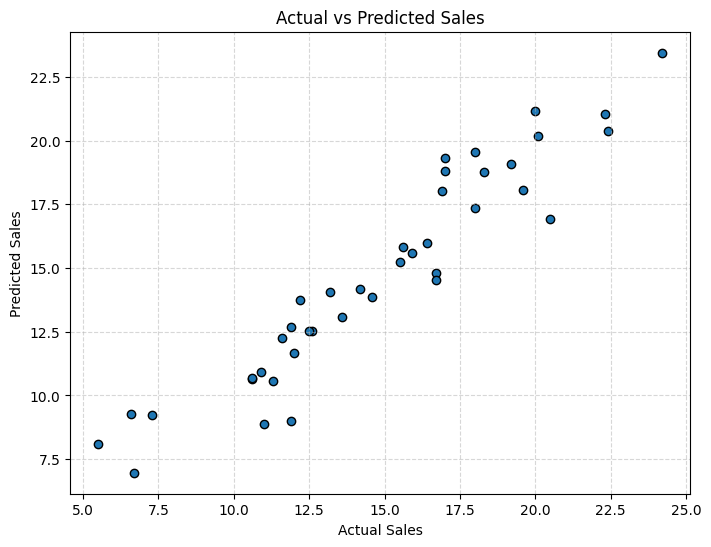

Model Performance:
R2 Score: 0.90
MSE: 2.02


In [10]:

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, edgecolors='k')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Performance:\nR2 Score: {r2:.2f}\nMSE: {mse:.2f}")


## 7. 3D Visualization: Sales vs TV & Radio

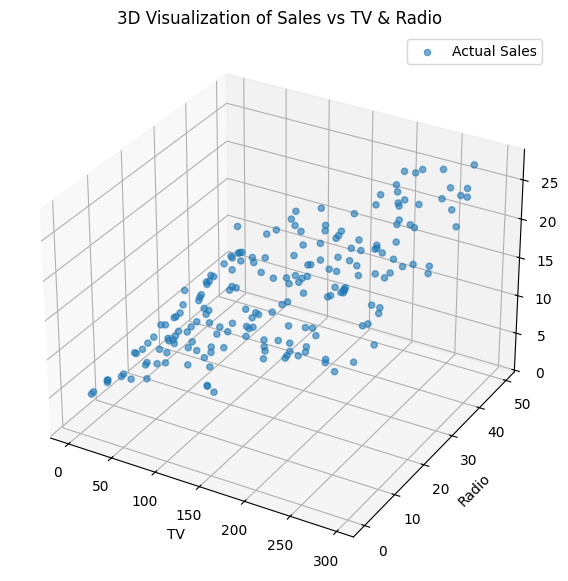

In [11]:

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['TV'], df['Radio'], df['Sales'], alpha=0.6, label='Actual Sales')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('3D Visualization of Sales vs TV & Radio')
plt.legend()
plt.show()


## 8. Predict on New Data

In [15]:

new_data = np.array([[200, 40, 50]])
new_prediction = model.predict(new_data)
print(f"Predicted Sales for TV=200, Radio=40, Newspaper=50: {new_prediction[0]:.2f}")


Predicted Sales for TV=200, Radio=40, Newspaper=50: 19.82


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 9. Impact of Normalization (StandardScaler)

In [13]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model_scaled = LinearRegression()
model_scaled.fit(X_train_s, y_train_s)
y_pred_s = model_scaled.predict(X_test_s)

r2_scaled = r2_score(y_test_s, y_pred_s)
print(f"R2 Score after Normalization: {r2_scaled:.2f}")


R2 Score after Normalization: 0.90


## 10. Model with Only Radio & Newspaper

In [16]:

X_rn = df[['Radio', 'Newspaper']]
X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(
    X_rn, y, test_size=0.2, random_state=42
)

model_rn = LinearRegression()
model_rn.fit(X_train_rn, y_train_rn)
y_pred_rn = model_rn.predict(X_test_rn)

r2_rn = r2_score(y_test_rn, y_pred_rn)
print(f"R2 Score using only Radio & Newspaper: {r2_rn:.2f}")


R2 Score using only Radio & Newspaper: -0.05
